# Project: Ensemble Techniques - Travel Package Purchase Prediction

### Background and Context

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well being.

However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

You as a Data Scientist at "Visit with us" travel company has to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced package.

### Objective

To predict which customer is more likely to purchase the long term travel package.

Data Dictionary

Customer details:

1. CustomerID: Unique customer ID
2. ProdTaken: Product taken flag
3. Age: Age of customer
4. PreferredLoginDevice: Preferred login device of the customer in last month
5. CityTier: City tier
6. Occupation: Occupation of customer
7. Gender: Gender of customer
8. NumberOfPersonVisited: Total number of person came with customer
9. PreferredPropertyStar: Preferred hotel property rating by customer
10. MaritalStatus: Marital status of customer
11. NumberOfTrips: Average number of the trip in a year by customer
12. Passport: Customer passport flag
13. OwnCar: Customers owns a car flag
14. NumberOfChildrenVisited: Total number of children visit with customer
15. Designation: Designation of the customer in the current organization
16. MonthlyIncome: Gross monthly income of the customer

### Customer interaction data: 

1. PitchSatisfactionScore: Sales pitch satisfactory score
2. ProductPitched: Product pitched by a salesperson
3. NumberOfFollowups: Total number of follow up has been done by sales person after sales pitch
4. DurationOfPitch: Duration of the pitch by a salesman to customer

### Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier

from sklearn import metrics

%matplotlib inline
sns.set(color_codes=True)

### Reading Data

In [2]:
dfTravel = pd.read_excel(io="Tourism.xlsx", sheet_name=1)
dfTravel.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [3]:
dfTravel.tail()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


Even with just 10 data rows we can see there is a missing value in Age.  We will check for others later on.

**Dropping CustomerID**: CustomerID does not give us any insights into the actual customers and their behaviors.  We will drop this column since it is just an identifier, not an actual feature.

In [4]:
dfTravel.drop(labels="CustomerID", axis=1, inplace=True)

In [5]:
dfTravel.shape

(4888, 19)

### Data Summary

In [6]:
dfTravel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ProdTaken                4888 non-null   int64  
 1   Age                      4662 non-null   float64
 2   TypeofContact            4863 non-null   object 
 3   CityTier                 4888 non-null   int64  
 4   DurationOfPitch          4637 non-null   float64
 5   Occupation               4888 non-null   object 
 6   Gender                   4888 non-null   object 
 7   NumberOfPersonVisited    4888 non-null   int64  
 8   NumberOfFollowups        4843 non-null   float64
 9   ProductPitched           4888 non-null   object 
 10  PreferredPropertyStar    4862 non-null   float64
 11  MaritalStatus            4888 non-null   object 
 12  NumberOfTrips            4748 non-null   float64
 13  Passport                 4888 non-null   int64  
 14  PitchSatisfactionScore  

- There are a mixture of data types.  The object data types will need to be converted to dummy numerical values using One Hot Encoding
- There are multiple missing values throughout the different features

In [7]:
dfTravel.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,4888.0,0.188216,0.390925,0.0,0.0,0.0,0.0,1.0
Age,4662.0,37.622265,9.316387,18.0,31.0,36.0,44.0,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.0,1.0,3.0,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.0,13.0,20.0,127.0
NumberOfPersonVisited,4888.0,2.905074,0.724891,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.0,4.0,4.0,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.0,3.0,4.0,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.0,3.0,4.0,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.0,0.0,1.0,1.0
PitchSatisfactionScore,4888.0,3.078151,1.365792,1.0,2.0,3.0,4.0,5.0


- The ProdTaken mean tells us only 18.8% of customers purchased a product
- Customers' ages are all in the adult range, from 18 to 61 with a slight skew towards being older
- Most customers prefer CityTier of 1
- DurationOfPitch has a very large maximum compared to the mean and median.  The feature is skewed right
    - We definitely need to check how DurationOfPitch compares to ProdTaken
- At least 75% of customers have taken at least 3 trips.  There is a large maximum at 22
- Only 29% of customers have a passport which hints that most customers want local destinations
- The PitchSatisfactionScore has a mean and median near 3 so the satisfaction scores on the whole are average
- Only 62% of customers own a car.  We can see how this is related to ProdTaken later
- Assuming MonthlyIncome holds the true values for each customer and has not been scaled to provide privacy, this does not appear to be customers from the United States given the average monthly income is about 23,000

### Dealing with missing values

In [8]:
dfTravel.isnull().sum() # number of missing values for each column

ProdTaken                    0
Age                        226
TypeofContact               25
CityTier                     0
DurationOfPitch            251
Occupation                   0
Gender                       0
NumberOfPersonVisited        0
NumberOfFollowups           45
ProductPitched               0
PreferredPropertyStar       26
MaritalStatus                0
NumberOfTrips              140
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisited     66
Designation                  0
MonthlyIncome              233
dtype: int64

Age, DurationOfPitch, MonthlyIncome and NumberOfTrips each have more than 100 missing values.

Let us check the percentage of missing values.

In [9]:
# The amount of missing values as a percent of the total number of values for each column
round(dfTravel.isnull().sum()/len(dfTravel)*100)[round(dfTravel.isnull().sum()/len(dfTravel)*100)>0]

Age                        5.0
TypeofContact              1.0
DurationOfPitch            5.0
NumberOfFollowups          1.0
PreferredPropertyStar      1.0
NumberOfTrips              3.0
NumberOfChildrenVisited    1.0
MonthlyIncome              5.0
dtype: float64

5.0% of values missing is not great.  We will try and fill them with the median for numerical values and the mode for the one object column (TypeOfContact).  We will need to check that our final model does not depend heavily on these features.

In [10]:
# Grabbing the column names that have missing values
nullCol = dfTravel.isnull().sum()[dfTravel.isnull().sum()>0].index
nullCol

Index(['Age', 'TypeofContact', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'NumberOfChildrenVisited',
       'MonthlyIncome'],
      dtype='object')

In [11]:
dfTravel[nullCol].dtypes # data types of columns with missing values

Age                        float64
TypeofContact               object
DurationOfPitch            float64
NumberOfFollowups          float64
PreferredPropertyStar      float64
NumberOfTrips              float64
NumberOfChildrenVisited    float64
MonthlyIncome              float64
dtype: object

We will replace all of the float64 columns (continous values) with the columns' medians and the object (words) column with its mode.

In [12]:
# Filling the numeric columns with the median
dfTravel.fillna(value=dfTravel.median(), inplace=True)

In [13]:
# Filling the object column with the mode
dfTravel.fillna(value=dfTravel["TypeofContact"].mode()[0], inplace=True)

In [14]:
dfTravel.isnull().sum()

ProdTaken                  0
Age                        0
TypeofContact              0
CityTier                   0
DurationOfPitch            0
Occupation                 0
Gender                     0
NumberOfPersonVisited      0
NumberOfFollowups          0
ProductPitched             0
PreferredPropertyStar      0
MaritalStatus              0
NumberOfTrips              0
Passport                   0
PitchSatisfactionScore     0
OwnCar                     0
NumberOfChildrenVisited    0
Designation                0
MonthlyIncome              0
dtype: int64

All missing values have been filled.

### Categorical Variables Summary

In [15]:
# Changing type object to type category to save memory
dfTravel[dfTravel.columns[dfTravel.dtypes=="object"]] = dfTravel[dfTravel.columns[dfTravel.dtypes=="object"]].astype("category")

In [16]:
dfTravel.info() # showing data type change worked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ProdTaken                4888 non-null   int64   
 1   Age                      4888 non-null   float64 
 2   TypeofContact            4888 non-null   category
 3   CityTier                 4888 non-null   int64   
 4   DurationOfPitch          4888 non-null   float64 
 5   Occupation               4888 non-null   category
 6   Gender                   4888 non-null   category
 7   NumberOfPersonVisited    4888 non-null   int64   
 8   NumberOfFollowups        4888 non-null   float64 
 9   ProductPitched           4888 non-null   category
 10  PreferredPropertyStar    4888 non-null   float64 
 11  MaritalStatus            4888 non-null   category
 12  NumberOfTrips            4888 non-null   float64 
 13  Passport                 4888 non-null   int64   
 14  PitchSat

In [17]:
dfTravel.describe(include=['category']).T

,count,unique,top,freq
TypeofContact,4888,2,Self Enquiry,3469
Occupation,4888,4,Salaried,2368
Gender,4888,3,Male,2916
ProductPitched,4888,5,Basic,1842
MaritalStatus,4888,4,Married,2340
Designation,4888,5,Executive,1842


- The large majority of customers self enquired to the company
- Most customers are male and the largest occupation group is salaried
- There are 3 gender categories so we need to look into what those categories are
- The largest group was pitched the basic package
    - It would be interesting to know the average profit for each package, this might affect the order resources are allocated for marketing in the future once we identify who to target
- Nearly half of customers are married

**Type of Contact**

In [18]:
holder = pd.DataFrame(dfTravel["TypeofContact"].value_counts())
holder["Normalized"] = dfTravel["TypeofContact"].value_counts(normalize=True)
holder

,TypeofContact,Normalized
Self Enquiry,3469,0.709697
Company Invited,1419,0.290303


**Occupation**

In [19]:
holder = pd.DataFrame(dfTravel["Occupation"].value_counts())
holder["Normalized"] = dfTravel["Occupation"].value_counts(normalize=True)
holder

,Occupation,Normalized
Salaried,2368,0.484452
Small Business,2084,0.426350
Large Business,434,0.088789
Free Lancer,2,0.000409


- Almost everyone is either a salaried employee or owner of a small business
- Free lancer has such a small amount of customers that we will need to be careful training on occupation
    - However, decision trees tend to be robust and not as sensitive to outliers as logistic regression classifiers

**Gender**

In [20]:
holder = pd.DataFrame(dfTravel["Gender"].value_counts())
holder["Normalized"] = dfTravel["Gender"].value_counts(normalize=True)
holder

,Gender,Normalized
Male,2916,0.596563
Female,1817,0.371727
Fe Male,155,0.031710


We are going to assume Fe Male is supposed to be Female and replace those values.

In [21]:
dfTravel.replace(to_replace="Fe Male", value="Female", inplace=True) # Replacing Fe Male with Female

In [22]:
holder = pd.DataFrame(dfTravel["Gender"].value_counts())
holder["Normalized"] = dfTravel["Gender"].value_counts(normalize=True)
holder

,Gender,Normalized
Male,2916,0.596563
Female,1972,0.403437


Most customers are still Male

**Product Pitched**

In [23]:
holder = pd.DataFrame(dfTravel["ProductPitched"].value_counts())
holder["Normalized"] = dfTravel["ProductPitched"].value_counts(normalize=True)
holder

,ProductPitched,Normalized
Basic,1842,0.376841
Deluxe,1732,0.354337
Standard,742,0.151800
Super Deluxe,342,0.069967
King,230,0.047054


- Just over 70% of all customers were pitched either the basic or deluxe package
- We need to look into the percentages of customers that purchased each product later

**Marital Status**

In [24]:
holder = pd.DataFrame(dfTravel["MaritalStatus"].value_counts())
holder["Normalized"] = dfTravel["MaritalStatus"].value_counts(normalize=True)
holder

,MaritalStatus,Normalized
Married,2340,0.478723
Divorced,950,0.194354
Single,916,0.187398
Unmarried,682,0.139525


Nearly half of all customers are married.  I wonder if the packages are built with this in mind or not.

**Designation**

In [25]:
holder = pd.DataFrame(dfTravel["Designation"].value_counts())
holder["Normalized"] = dfTravel["Designation"].value_counts(normalize=True)
holder

,Designation,Normalized
Executive,1842,0.376841
Manager,1732,0.354337
Senior Manager,742,0.151800
AVP,342,0.069967
VP,230,0.047054


### Univariate Analysis

In [26]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins=None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # number of rows of the subplot grid = 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)},
                                           figsize = figsize
                                           ) # creating the 2 subplots
    sns.boxplot(x=feature, ax=ax_box2, showmeans=True, color="violet") # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(x=feature, ax=ax_hist2, bins=bins, palette="winter") if bins else sns.histplot(x=feature, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color="green", linestyle="--", label="Mean = "+str(round(np.mean(feature),2))) # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color="black", linestyle="-.", label="Median = "+str(round(np.median(feature),2))) # Add median to the histogram
    ax_hist2.legend()

**Age**

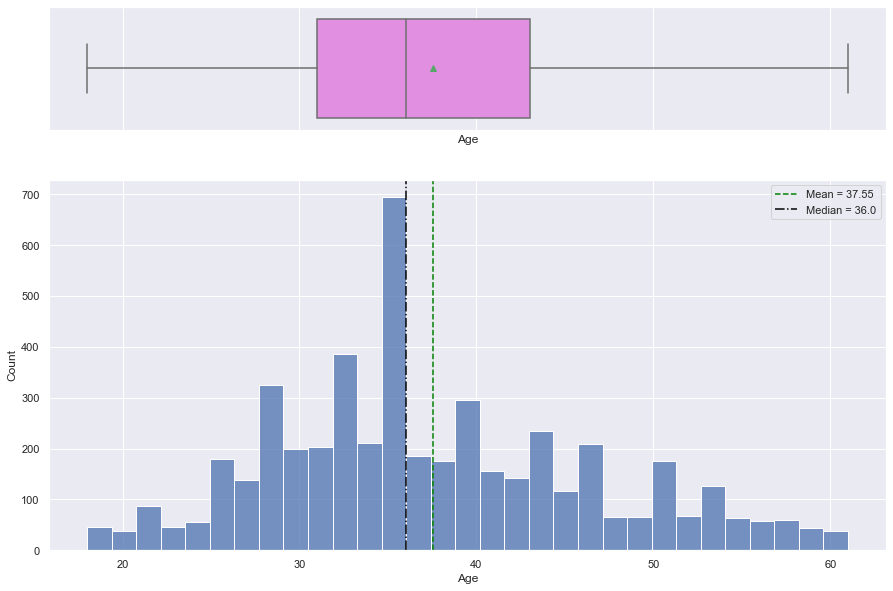

In [27]:
histogram_boxplot(feature=dfTravel["Age"])

Age has a slight skew to the right.  There is a large spike in customers around 36 years of age.

There are also no statistical outliers.

**Duration of Pitch**

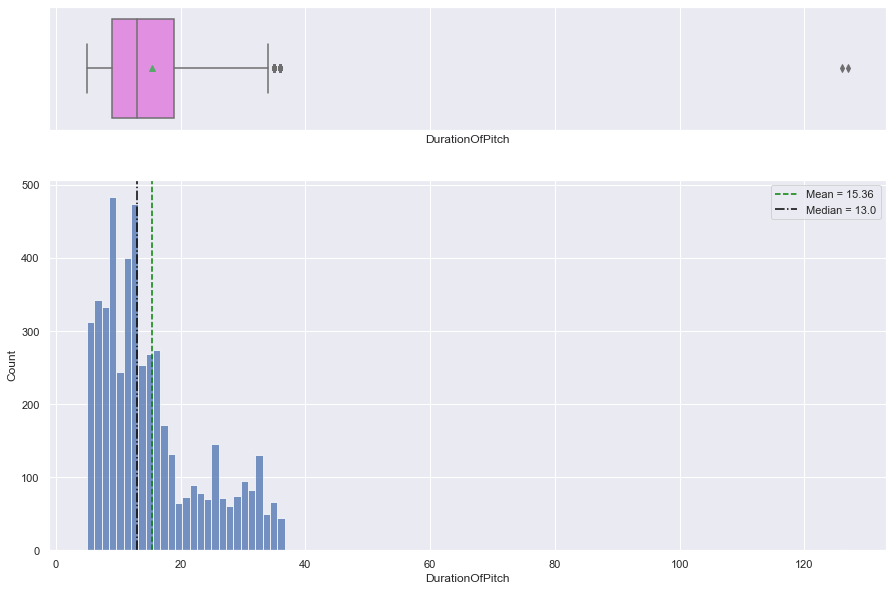

In [28]:
histogram_boxplot(feature=dfTravel["DurationOfPitch"])

- Duration of pitch seems to almost have a Poisson distribution by eyeballing it
- There is a skew to the right with a few statistical outliers, a few that are rather large

**Number of Trips**

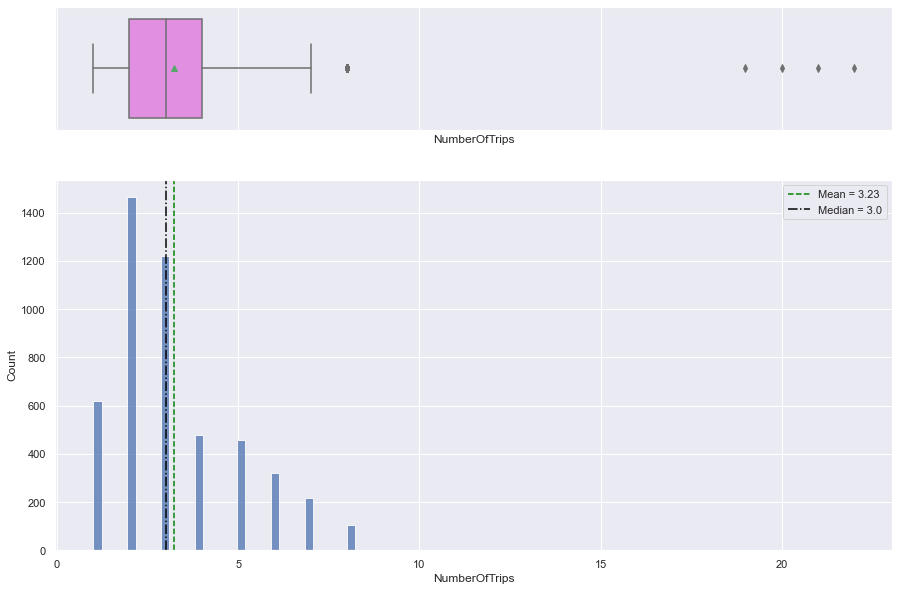

In [29]:
histogram_boxplot(feature=dfTravel["NumberOfTrips"])

- There is a slight skew to the right
- The mode of trips taken is 2
- No customer has taken 0 trips
- There are a few statistical outliers ranging from around 8 to 22 trips

**Monthly Income**

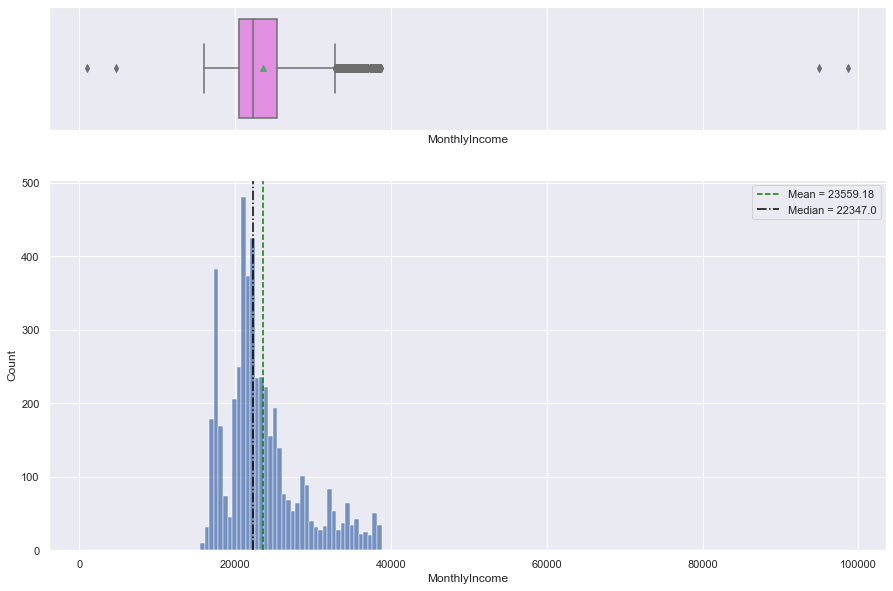

In [30]:
histogram_boxplot(feature=dfTravel["MonthlyIncome"])

- Monthly income is skewed to the right as income normally is
- There are a few very low income values
    - Hopefully these are correctly inputed values and not incomes in a different currency that were not converted or something else

In [31]:
# Function to create barplots that indicate percentage for each category

def perc_on_bar(plot, feature):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """
    total = len(feature) # length of the column
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width()/2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height() # height of the plot
        plot.annotate(percentage, (x,y), size=12) # annotate the percentage
    plt.show() # show the plot

**ProdTaken**

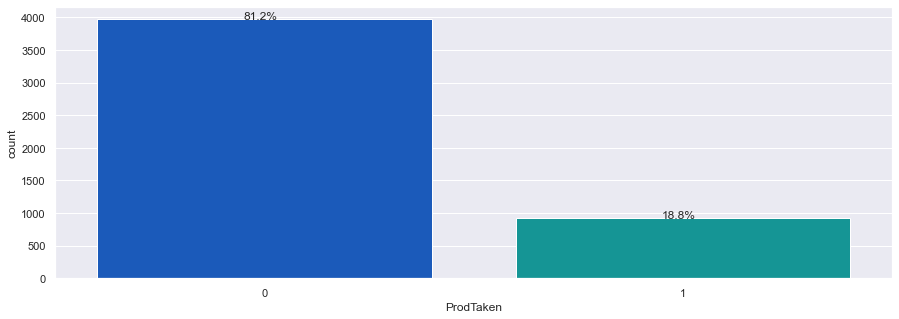

In [32]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x=dfTravel["ProdTaken"], palette="winter")
perc_on_bar(plot=ax, feature=dfTravel["ProdTaken"])

Only 18.8% of customers purchased a package.  We will hopefully be able to greatly increase this percentage.

**Type of Contact**

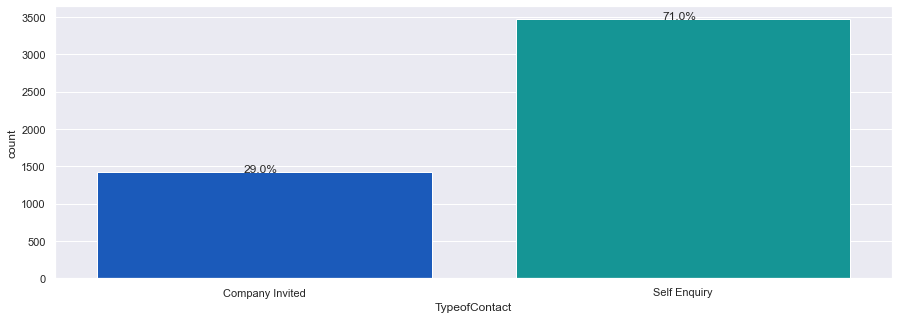

In [33]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x=dfTravel["TypeofContact"], palette="winter")
perc_on_bar(plot=ax, feature=dfTravel["TypeofContact"])

With most customers being self enquiry, it will be interesting to see the percentage of these customer groups that purchased a package.

**City Tier**

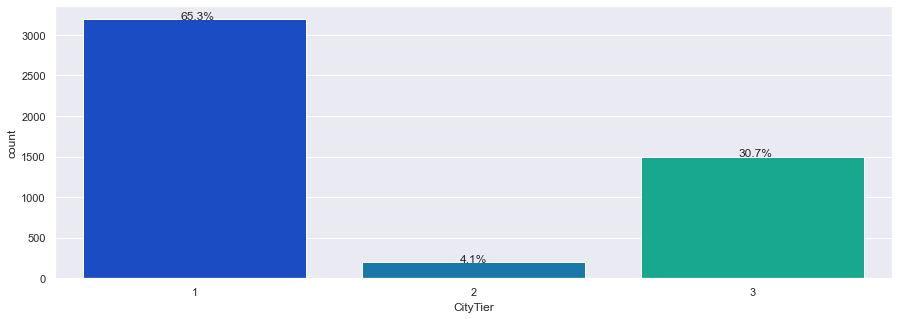

In [34]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x=dfTravel["CityTier"], palette="winter")
perc_on_bar(plot=ax, feature=dfTravel["CityTier"])

- Most customers prefer CityTier 1
- Without knowing what exactly the tiers represent we can't say much more than the vast majority of customers like tier 1 or 3, not many want the middle tier
    - This may mean customers either want expensive or not expensive cities in general

**Occupation**

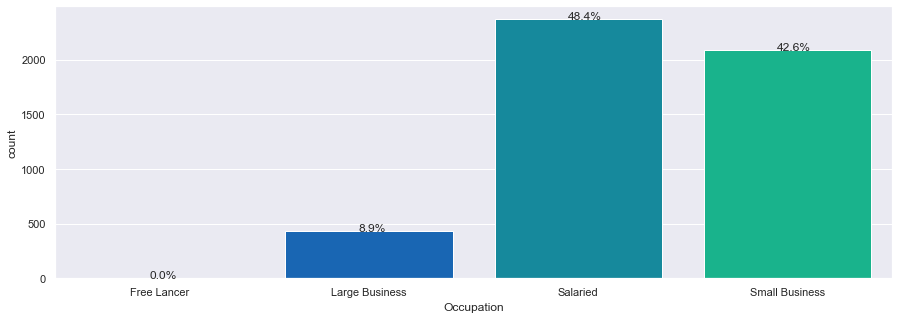

In [35]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x=dfTravel["Occupation"], palette="winter")
perc_on_bar(plot=ax, feature=dfTravel["Occupation"])

- Most all customers are either salaried or small business owners
- Almost none are free lancers, the 0.0% is only because of rounding

**Gender**

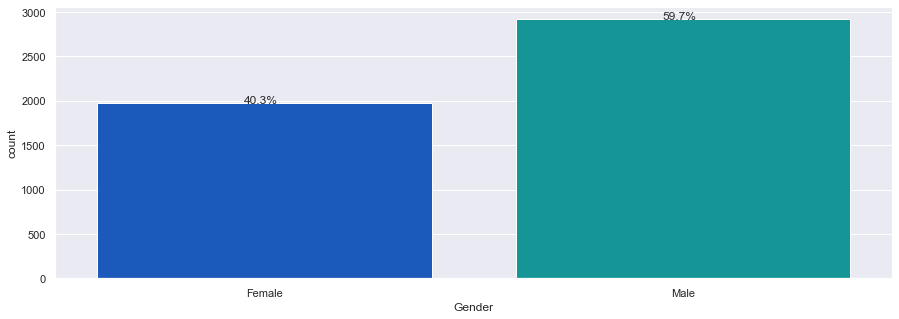

In [36]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x=dfTravel["Gender"], palette="winter")
perc_on_bar(plot=ax, feature=dfTravel["Gender"])

There are more male customers than female customers.  We'll look at purchase rates later.

**Number of Person Visited**

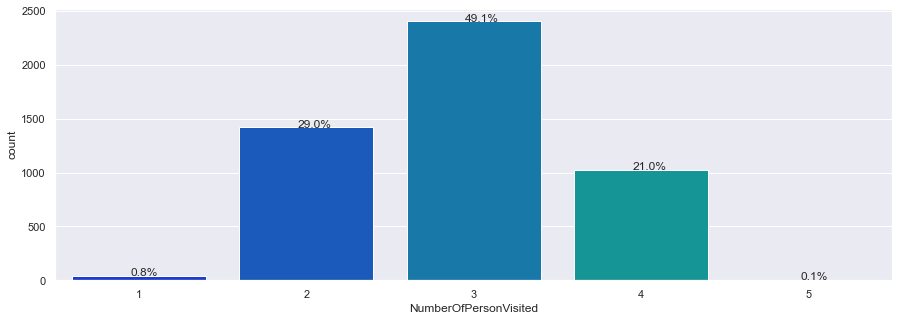

In [37]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x=dfTravel["NumberOfPersonVisited"], palette="winter")
perc_on_bar(plot=ax, feature=dfTravel["NumberOfPersonVisited"])

- There are very few customers who travel alone or with groups of 5 or more
- The largest grouping is 3 customers, which might reflect a married couple with 1 child

**Number of Followups**

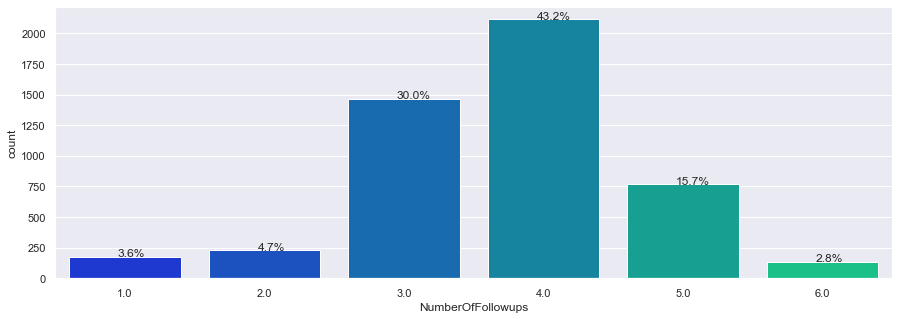

In [38]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x=dfTravel["NumberOfFollowups"], palette="winter")
perc_on_bar(plot=ax, feature=dfTravel["NumberOfFollowups"])

- The vast majority of followups have a count of 3 to 5
- Given only 18.8% of customers actually purchase a product it will be interesting to see which group has the highest purchase rate

**Product Pitched**

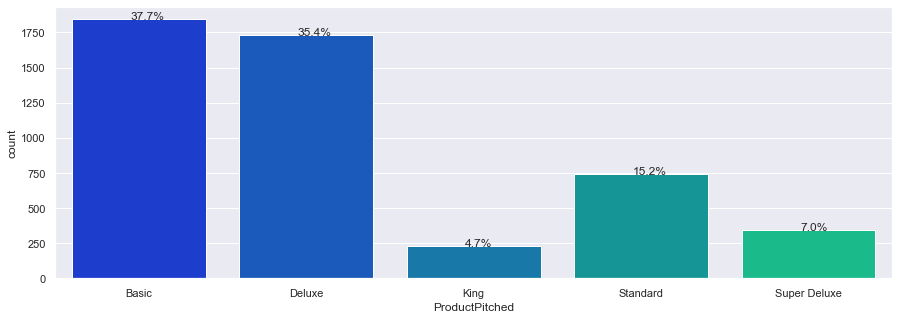

In [39]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x=dfTravel["ProductPitched"], palette="winter")
perc_on_bar(plot=ax, feature=dfTravel["ProductPitched"])

- Most all of the customers were pitched the basic or deluxe package
    - I find this interesting since there is a package called Standard and that isn't the main product that is pitched

**Preferred Property Star**

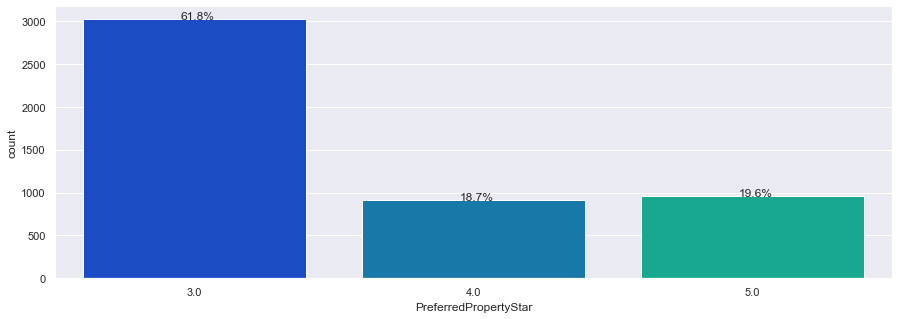

In [40]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x=dfTravel["PreferredPropertyStar"], palette="winter")
perc_on_bar(plot=ax, feature=dfTravel["PreferredPropertyStar"])

- The mode of preferred property star is firmly 3 stars which tends to be a less expensive property than 4 or 5 stars
- The number of customers who prefer 4 or 5 stars is rather similar

**Marital Status**

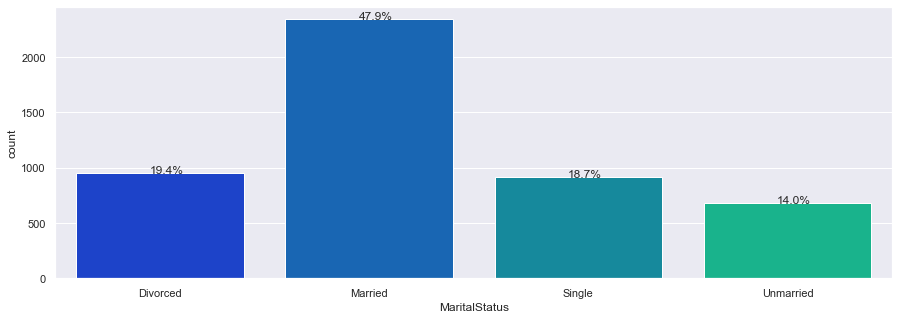

In [41]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x=dfTravel["MaritalStatus"], palette="winter")
perc_on_bar(plot=ax, feature=dfTravel["MaritalStatus"])

- Nearly half of customers are married
- Even though slightly more than half of customers are not married, not many customers travelled alone as we saw above

**Number of Trips**

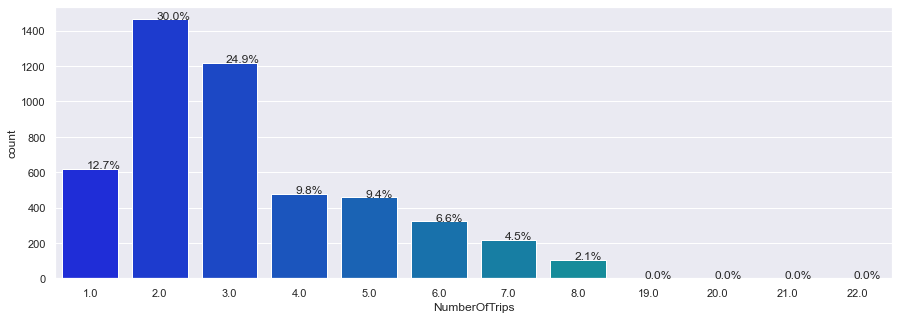

In [42]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x=dfTravel["NumberOfTrips"], palette="winter")
perc_on_bar(plot=ax, feature=dfTravel["NumberOfTrips"])

Below 4 trips are where the majority of customers lie

**Passport**

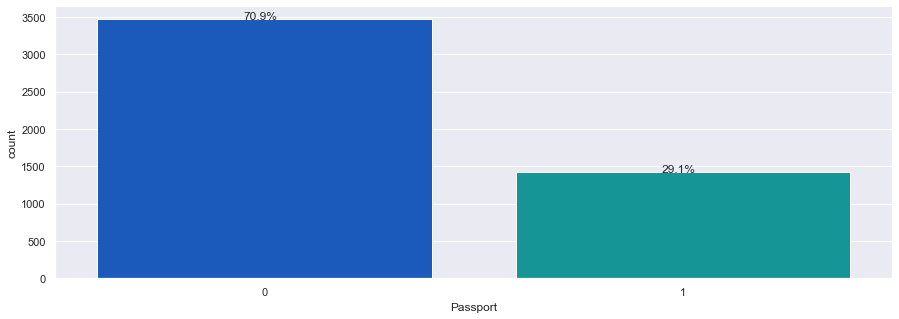

In [43]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x=dfTravel["Passport"], palette="winter")
perc_on_bar(plot=ax, feature=dfTravel["Passport"])

Less than 30% of customers have a passport which probably indicates most customers want to travel in country.

**Pitch Satisfaction Score**

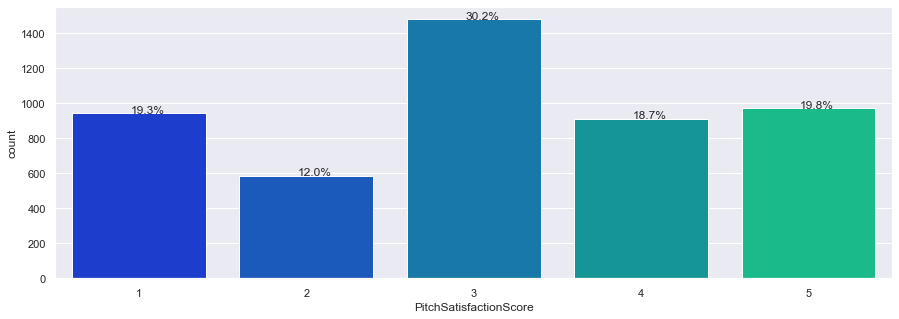

In [44]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x=dfTravel["PitchSatisfactionScore"], palette="winter")
perc_on_bar(plot=ax, feature=dfTravel["PitchSatisfactionScore"])

- The largest group is a score of 3 with most of the scores being a 3 or more
- 19.3% of customers rated their satisfaction with the pitch at a 1 and 12% at a 2
    - It seems improvement could definitely be made to increase the quality of pitches

**Own Car**

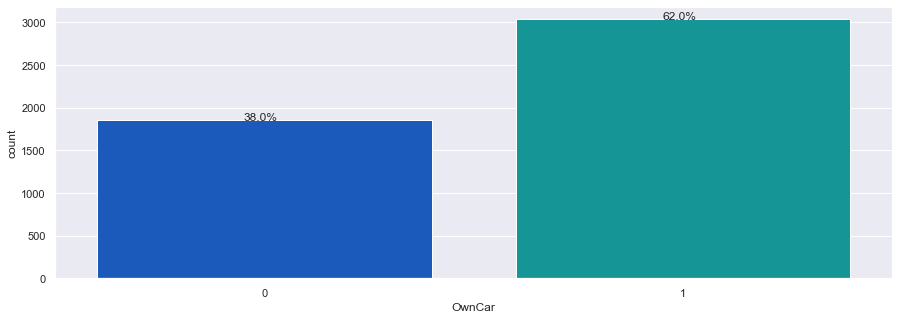

In [45]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x=dfTravel["OwnCar"], palette="winter")
perc_on_bar(plot=ax, feature=dfTravel["OwnCar"])

- Only 62% of customers own a car so a large number of people will be relying on other means of transportation
- This may need to be reflected in the locations of the packages offered
    - There probably needs to be a significant number of locations which have good public transportation and are easy to get to with public transportation

**Number of Children Visited**

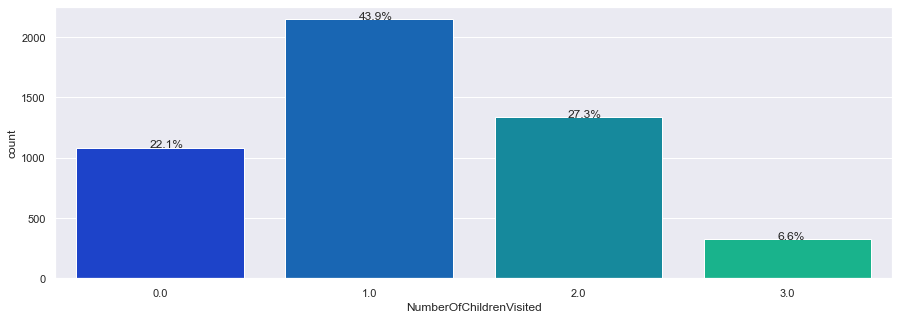

In [46]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x=dfTravel["NumberOfChildrenVisited"], palette="winter")
perc_on_bar(plot=ax, feature=dfTravel["NumberOfChildrenVisited"])

Given that more than 75% of customers have at least one child there needs to be clear communication in the packages on what each location has that would be of interest to children as well as adults.

**Designation**

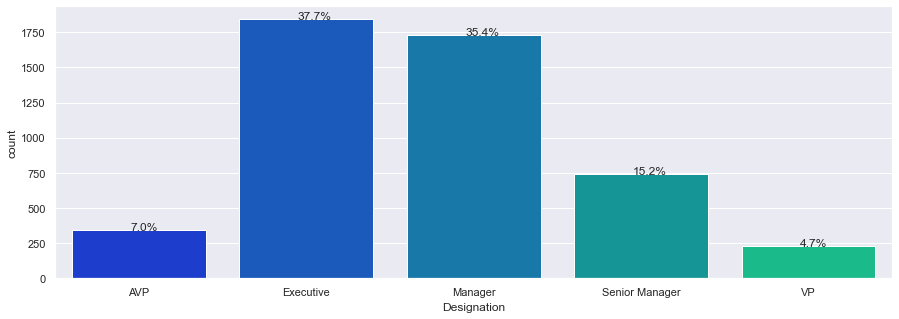

In [47]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x=dfTravel["Designation"], palette="winter")
perc_on_bar(plot=ax, feature=dfTravel["Designation"])

Most customers are in the executive or manager designation.

### Bivariate Analysis

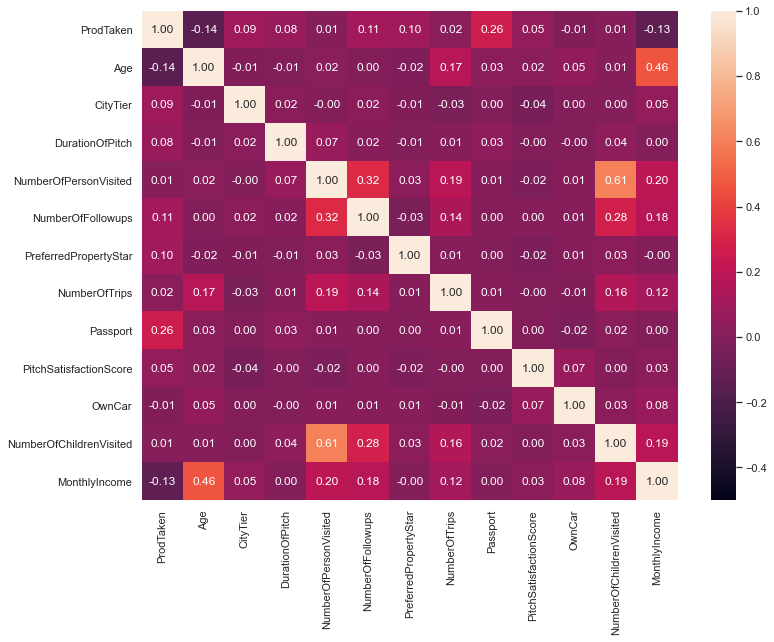

In [48]:
# Heat map of correlation between numeric variables
plt.figure(figsize=(12,9))
sns.heatmap(data=dfTravel.corr(), annot=True, vmin=-.5, vmax=1, fmt=".2f")
plt.show()

- There are no strong correlations between the features
- The strongest correlation between the ProdTaken and any feature is with Passport, though it is a rather weak correlation
    - This seems to make sense because people with passports get passports in order to travel, though not always for vacation
- Since correlation is based on linear models and we have all weak correlations with the target variable ProdTaken, this is not a good candidate most likely for a linear model so it is good we are using decision trees and the like

#### Pairplot showing different colors for ProdTaken

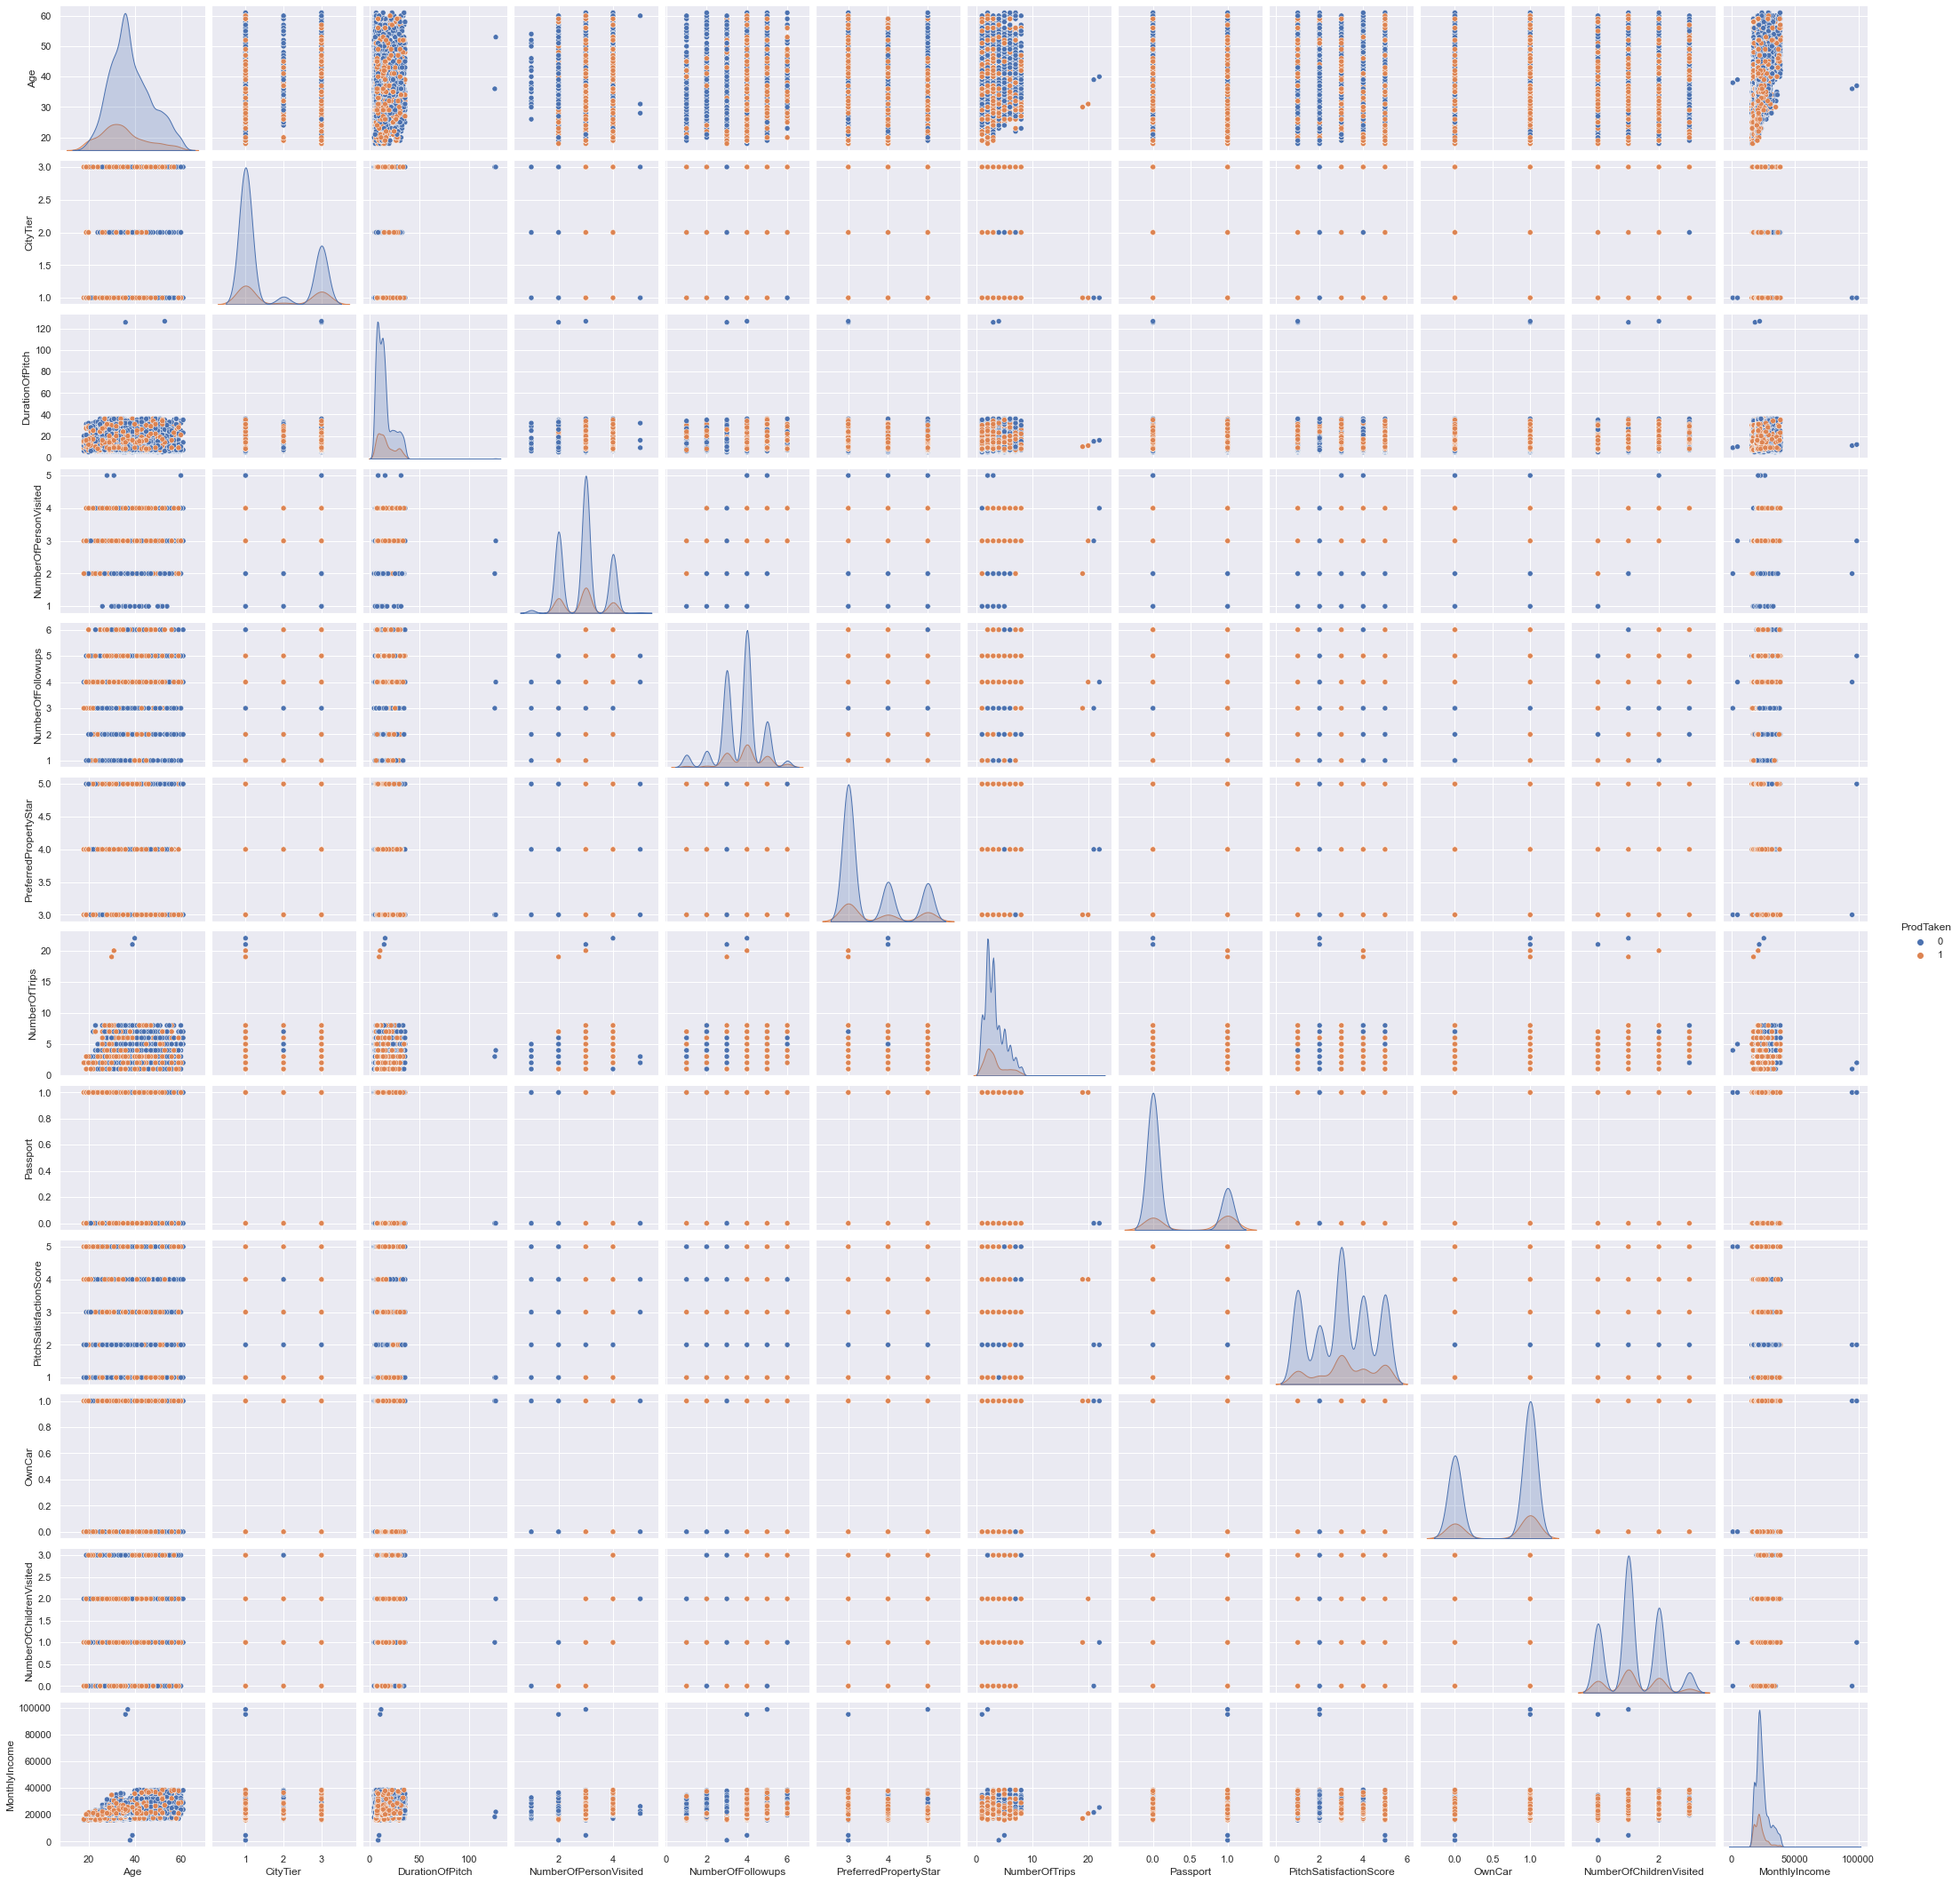

In [49]:
g = sns.pairplot(data=dfTravel, hue="ProdTaken")
plt.show()

- It appears that Age has a distribution that shows younger customers are more likely to purchase a product
- Nearly no one who prefers city tier two seems to have purchased a product
    - This may suggest not many packages include that city tier
- It looks like only NumberOfFollowups above 2 really has anyone purchasing a product
- Number of children being 3 seems to negatively impact purchasing a package
- There do seem to be groupings of values in the 2D scatterpoint plots that our decision trees will be able to take advantage of

#### Individual Features vs Prod Taken

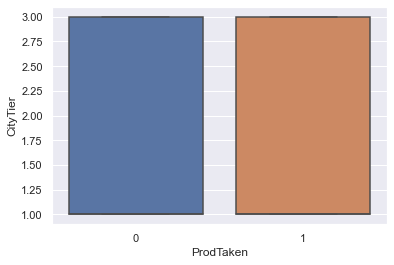

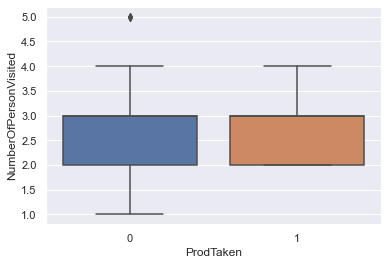

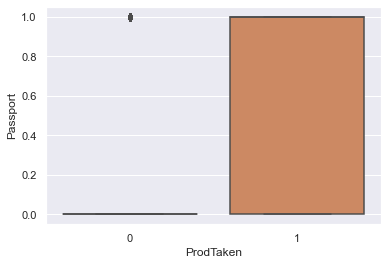

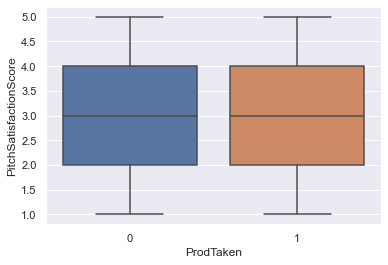

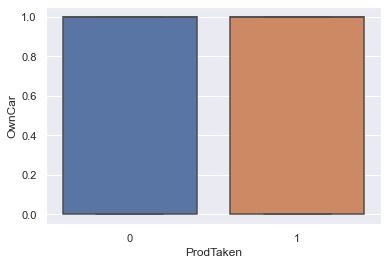

In [49]:
# Boxplots for each integer feature vs prodtaken
for col in dfTravel.columns[dfTravel.dtypes=="int64"][1:]:
    sns.boxplot(y=col, x = "ProdTaken", data=dfTravel)
    plt.show()

- For customers who did not purchase a product, almost all did not have a passport
    - Only statistical outliers did have a passport
- PitchSatisfactionScore seems to have the same basic distribution for product taken vs not taken
    - This suggests the importance of the satisfaction score may be low
- Owning a car seems to not strongly affect the purchase of a product

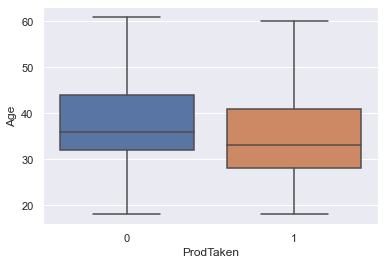

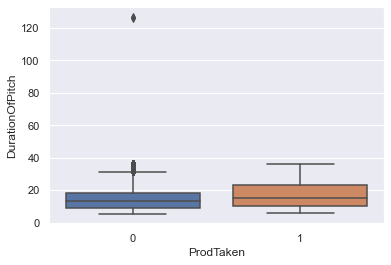

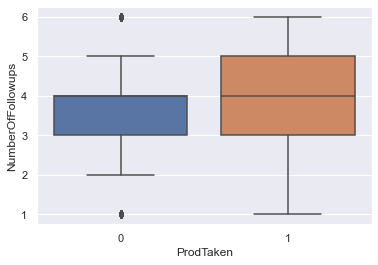

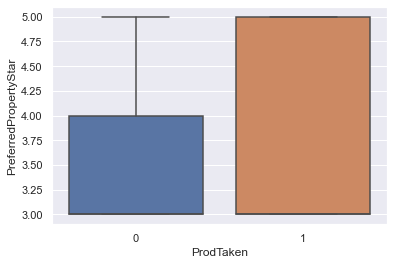

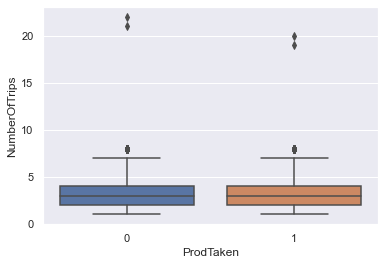

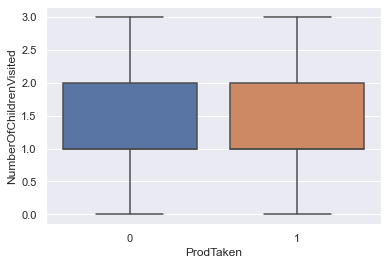

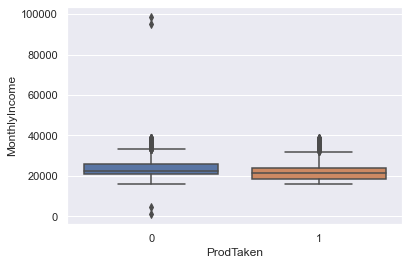

In [50]:
# Boxplots for each floating point decimal feature vs prodtaken
for col in dfTravel.columns[dfTravel.dtypes=="float64"]:
    sns.boxplot(y=col, x = "ProdTaken", data=dfTravel)
    plt.show()

- The distributions of age show younger customers are slightly more likely to purchase a package
- There are no statistical outliers in DurationOfPitch for customers who purchased a package
    - All of the above 120 minute pitches resulted in customers who did not purchase packages
- Number of followups is more spread for customers who purchased as compared to customers who did not
- Preferred property star shows that 75% or more of customers did not choose 5 stars if they did not end up purchasing a product
    - Therefore, customers who choose 5 stars were more likely to purchase a product it seems
- Number of trips and number of children have very similar distributions for product taken vs not taken
- There appears to be a slight difference in distributions of MonthlyIncome vs ProdTaken
    - The median monthly income is slightly more for non-purchasers as compared to purchasers
    - None of the highest income customers purchased a package

#### Product Taken vs Categorical Variables

In [51]:
# Function to display the cross tabulations and barplots for categorical variables
def stacked_plot(x):
    #sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,dfTravel['ProdTaken'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,dfTravel['ProdTaken'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.axhline(dfTravel["ProdTaken"].value_counts(normalize=True)[0], color="black", linestyle="--", label="Mean Percent Not Purchased")
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

**The black, horizontal, dashed line shows the mean percentage of customers who did not purchase.**

If the orange section extends below this line, the value did better than average in getting the customer to purchase.

ProdTaken           0    1   All
TypeofContact                   
Company Invited  1109  310  1419
Self Enquiry     2859  610  3469
All              3968  920  4888
------------------------------------------------------------------------------------------------------------------------


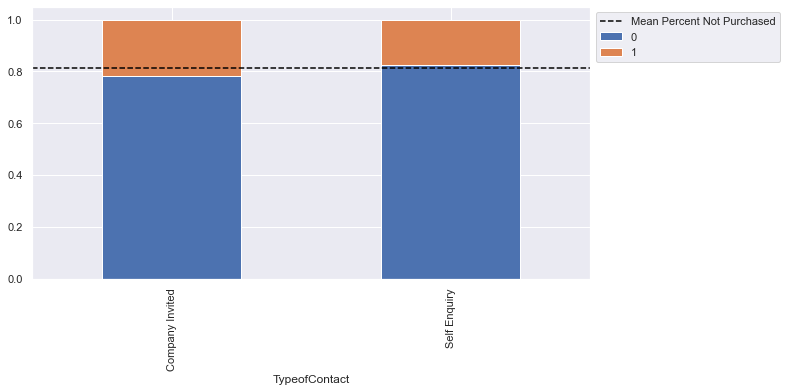

ProdTaken          0    1   All
Occupation                     
Free Lancer        0    2     2
Large Business   314  120   434
Salaried        1954  414  2368
Small Business  1700  384  2084
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


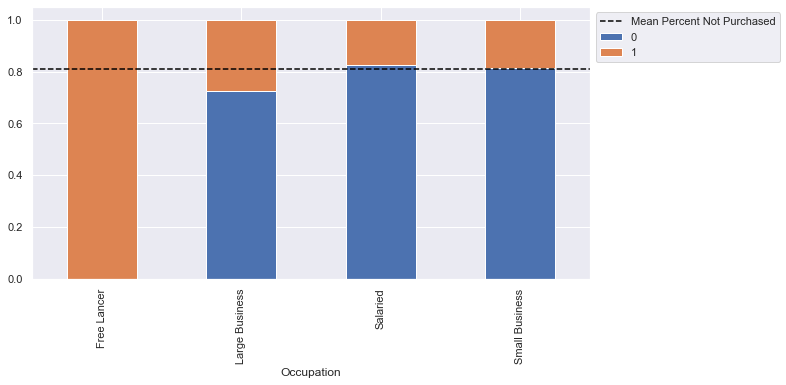

ProdTaken     0    1   All
Gender                    
Female     1630  342  1972
Male       2338  578  2916
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


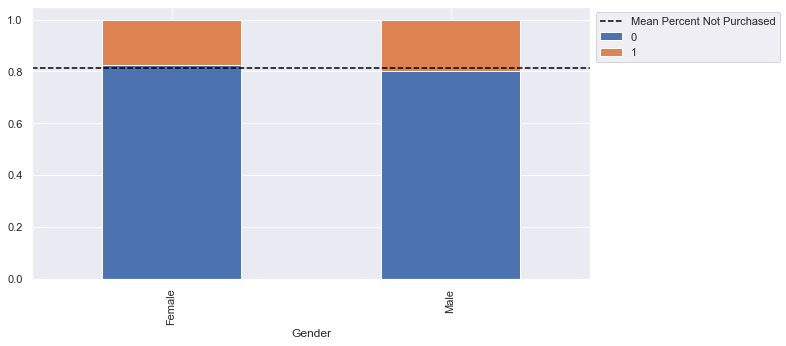

ProdTaken          0    1   All
ProductPitched                 
Basic           1290  552  1842
Deluxe          1528  204  1732
King             210   20   230
Standard         618  124   742
Super Deluxe     322   20   342
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


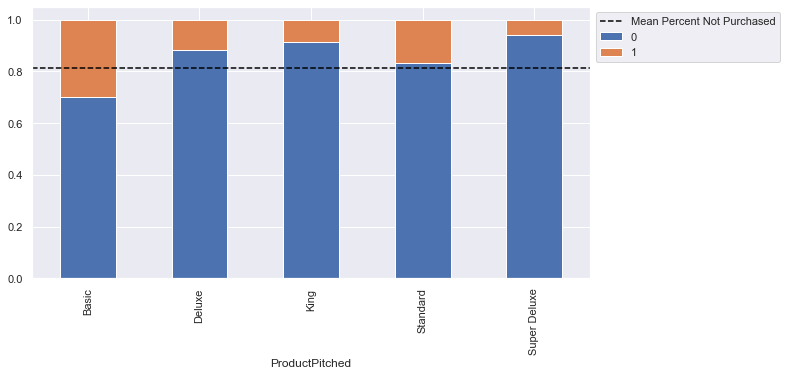

ProdTaken         0    1   All
MaritalStatus                 
Divorced        826  124   950
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
All            3968  920  4888
------------------------------------------------------------------------------------------------------------------------


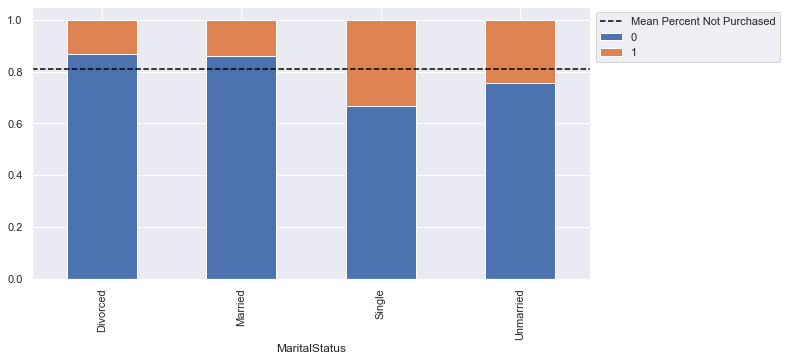

ProdTaken          0    1   All
Designation                    
AVP              322   20   342
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
VP               210   20   230
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


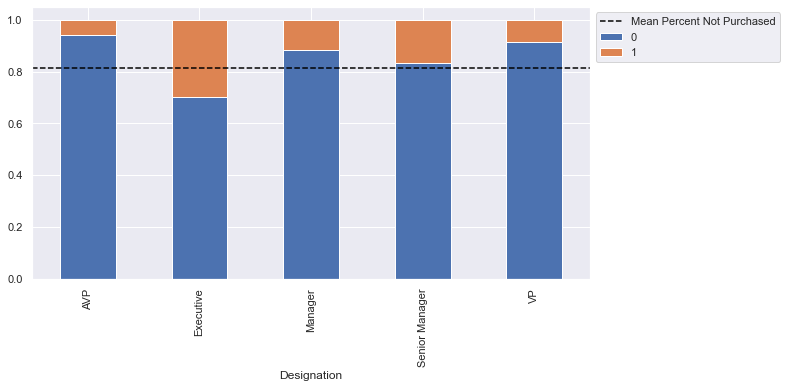

In [52]:
# Showing the information for each categorical variable
for col in dfTravel.columns[dfTravel.dtypes=="category"]:
    stacked_plot(x=dfTravel[col])

- Customers who were invited by the company had a slighly higher percentage of purchasing a package
- All Freelancers purchased a product, however this is just 2 rows in our data
    - Large Business owners have the second highest purchase percentage
    - Small Business and Salary have about the same percentage
- Gender does not seem to affect whether a customer puchases a product
- Customers who were marketed the basic package were most likely to purchase a package
    - Super deluxe was the least likely to purchase
- Single customers were more likely to purchase a package
    - Divorced and married customers are the least likely
- Customers who are designated as Executive were the most likely to purchase a package
    - AVP the least likely to purchase

## Create Dummy Variables

Our models cannot train on text so we need to convert them to binary data using one hot encoding.

In [53]:
# We will drop the first value so as not to have dependent features
dfTravel = pd.get_dummies(data=dfTravel, drop_first=True)
dfTravel.head()

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,...,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,1,41.0,3,6.0,3,3.0,3.0,1.0,1,2,...,0,0,0,0,1,0,0,1,0,0
1,0,49.0,1,14.0,3,4.0,4.0,2.0,0,3,...,0,0,0,0,0,0,0,1,0,0
2,1,37.0,1,8.0,3,4.0,3.0,7.0,1,3,...,0,0,0,0,1,0,1,0,0,0
3,0,33.0,1,9.0,2,3.0,3.0,2.0,1,5,...,0,0,0,0,0,0,1,0,0,0
4,0,36.0,1,8.0,2,3.0,4.0,1.0,0,5,...,0,0,0,0,0,0,1,0,0,0


## Split the data

In [54]:
x = dfTravel.drop(columns=["ProdTaken"]) # Grabs all columns that are not the target variable
y = dfTravel["ProdTaken"] # Grabs only the target variable

In [55]:
# We are stratifying on the ProdTaken data so as to balance the amount of products purchased vs not purchased in our training
# and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1, stratify=y)
x_train.shape, x_test.shape

((3421, 28), (1467, 28))

In [56]:
y_train.value_counts(1) # Normalized value counts ie percents

0    0.811751
1    0.188249
Name: ProdTaken, dtype: float64

In [57]:
y_test.value_counts(1) # Normalized value counts ie percents

0    0.811861
1    0.188139
Name: ProdTaken, dtype: float64

We see that there are essentially the same amount of purchasers vs non-purchasers in the training and test data.

### Choosing a metric score

Two times in the project description it was noted that the marketing cost was quite high due to randomly marketing to customers.  Depending on exactly how high this cost is compared to the cost of not getting a sale from a customer targeted will tell us which metric is best for this application.

To lower the high cost of marketing to customers who probably will not purchase a package we should use precision as our metric score.  This will strive to reduce the number of false positives, thus lowering our marketing costs.

To lower the cost of not finding a customer who would have purchased a product we should use recall as our metric score.  This will force the model to reduce the number of false negatives, thus finding the highest number of actual customers who will end up purchasing a package.

Another option would be to look at F1 Score as a sort of balance between the two.

Since we don't know the exact comparision of those two costs we will use the precision as our metric score to lower the marketing cost since it is specifically mentioned multiple times in the project brief.

In [58]:
##  Function to calculate f1 score
def get_precision_score(model,flag=True):
    '''
    model : classifier to predict values of x

    '''
    c = [] # defining an empty list to store train and test results
    train_p = metrics.precision_score(y_true=y_train, y_pred=model.predict(x_train))
    test_p = metrics.precision_score(y_true=y_test, y_pred=model.predict(x_test))
    c.append(train_p) # adding train f1 score to list
    c.append(test_p) # adding test f1 score to list
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("Precision score on training set : ",metrics.precision_score(y_true=y_train, y_pred=model.predict(x_train)))
        print("Precision score on test set : ",metrics.precision_score(y_true=y_test, y_pred=model.predict(x_test)))
    
    return c # returning the list with train and test scores

In [59]:
# Confusion Matrix w/ labels and percentages
def make_confusion_matrix(model,y_actual=y_test,labels=[1, 0]):
    '''
    model : classifier to predict values of x
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(x_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Decision Tree

In [60]:
# Training the decision tree
dtree = DecisionTreeClassifier(random_state=1)
dtree.fit(X=x_train, y=y_train)

DecisionTreeClassifier(random_state=1)

In [66]:
dtree_p = get_precision_score(model=dtree)

Precision score on training set :  1.0
Precision score on test set :  0.6763636363636364


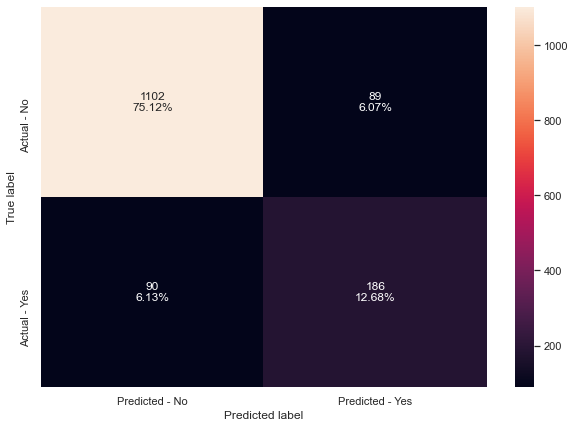

In [67]:
make_confusion_matrix(model=dtree)

Having a precision score of 1.0 means the decision tree is overfitting the training data especially when compared to the 0.676 for the test set.

## Tuned Decision Tree

In [76]:
# Choose the type of classifier
dtree_estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {"max_depth": np.arange(2,30),
              "min_samples_leaf": [1, 2, 5, 7, 10],
              "max_leaf_nodes": [2, 3, 5, 10, 15, 20],
              "min_impurity_decrease": [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]
             }

scorer = metrics.make_scorer(score_func=metrics.precision_score)

# Run the grid search
grid_obj = GridSearchCV(estimator=dtree_estimator, param_grid=parameters, n_jobs=-1, scoring=scorer) # n_jobs=-1 means use all processors
grid_obj = grid_obj.fit(X=x_train, y=y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data
dtree_estimator.fit(X=x_train, y=y_train)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=10,
                       min_impurity_decrease=1e-06, random_state=1)

In [77]:
tuned_dtree_p = get_precision_score(model=dtree_estimator)

Precision score on training set :  0.7622950819672131
Precision score on test set :  0.78


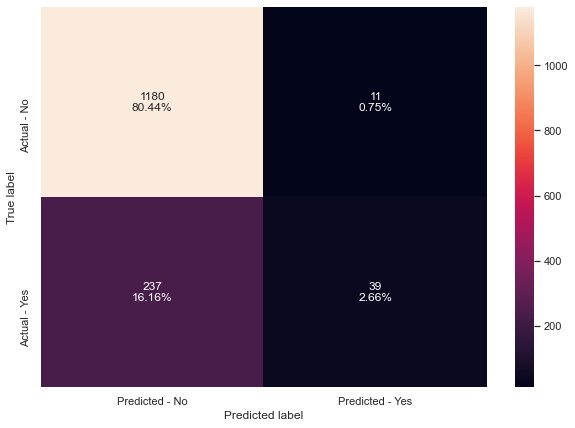

In [78]:
make_confusion_matrix(model=dtree_estimator)

We can see that tuning the decision tree did stop the model from overfitting so we now have a generic model and our precision score has improved slightly on the test data.

## Bagging Classifier

In [83]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X=x_train, y=y_train)

BaggingClassifier(random_state=1)

In [84]:
bagging_p = get_precision_score(model=bagging)

Precision score on training set :  1.0
Precision score on test set :  0.875


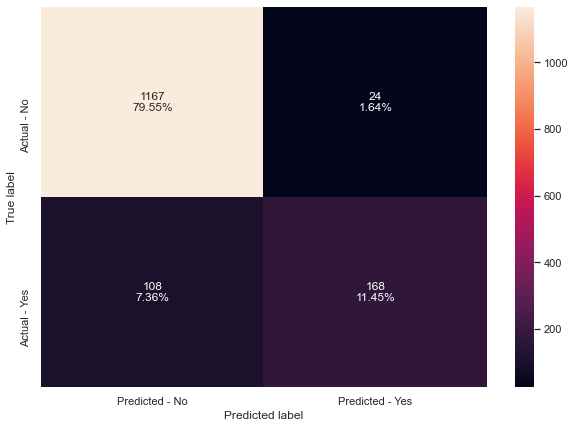

In [85]:
make_confusion_matrix(model=bagging)

The basic Bagging Classifier is also overfitting on the training data.

## Tuned Bagging Classifier

In [87]:
# Grid search for bagging classifier
cl1 = DecisionTreeClassifier(random_state=1)

param_grid = {"base_estimator": [cl1],
              "n_estimators": [5, 7, 15, 51, 101],
              "max_samples": [0.7, 0.8, 0.9, 1],
              "max_features": [0.7, 0.8, 0.9, 1]
             }

grid = GridSearchCV(estimator=BaggingClassifier(random_state=1, bootstrap=True), param_grid=param_grid, cv=5, n_jobs=-1, scoring=scorer)
grid.fit(X=x_train, y=y_train)

# getting the best estimator
bagging_estimator = grid.best_estimator_
bagging_estimator.fit(X=x_train, y=y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1),
                  max_features=0.7, max_samples=0.9, n_estimators=51,
                  random_state=1)

In [88]:
tuned_bagging_p = get_precision_score(model=bagging_estimator)

Precision score on training set :  1.0
Precision score on test set :  0.9337349397590361


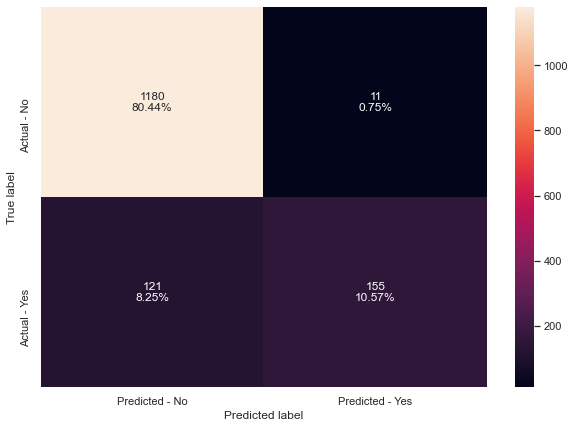

In [89]:
make_confusion_matrix(model=bagging_estimator)

The tuned Bagging Classifier is overfitting just like the basic Bagging Classifier.

## Random Forest

In [92]:
rf = RandomForestClassifier(random_state=1, class_weight="balanced")
rf.fit(X=x_train, y=y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

In [93]:
rf_p = get_precision_score(model=rf)

Precision score on training set :  1.0
Precision score on test set :  0.9559748427672956


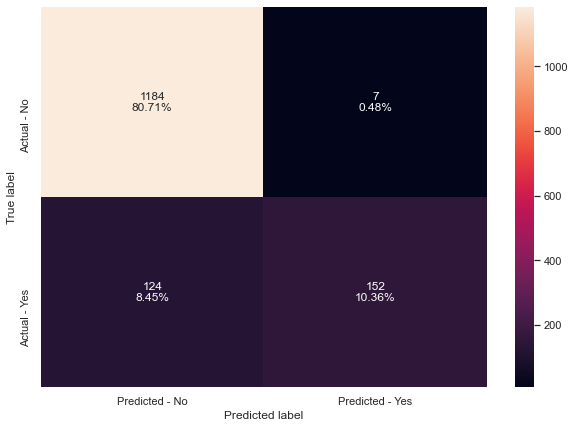

In [94]:
make_confusion_matrix(model=rf)

The basic Random Forest is overfitting the training data but the precision score on the test is a lot better than most other models.

## Tuned Random Forest

In [95]:
# Choose the type of classifier
rf_estimator = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

# Grid of parameters to choose from
parameters = {"max_features": ['sqrt', 'log2', 'auto'],
              "min_samples_leaf": np.arange(1,15,5),
              "min_samples_split": np.arange(2,20,5),
              "n_estimators": list(np.linspace(10,50,10,dtype="int"))
             }

# Run the grid search
grid_obj = GridSearchCV(estimator=rf_estimator, param_grid=parameters, cv=5, n_jobs=-1, scoring=scorer)
grid_obj = grid_obj.fit(X=x_train, y=y_train)

# Set the clf to the best combination of parameters
rf_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data
rf_estimator.fit(X=x_train, y=y_train)

RandomForestClassifier(max_features='log2', n_estimators=32, oob_score=True,
                       random_state=1)

In [96]:
tuned_rf_p = get_precision_score(model=rf_estimator)

Precision score on training set :  1.0
Precision score on test set :  0.9386503067484663


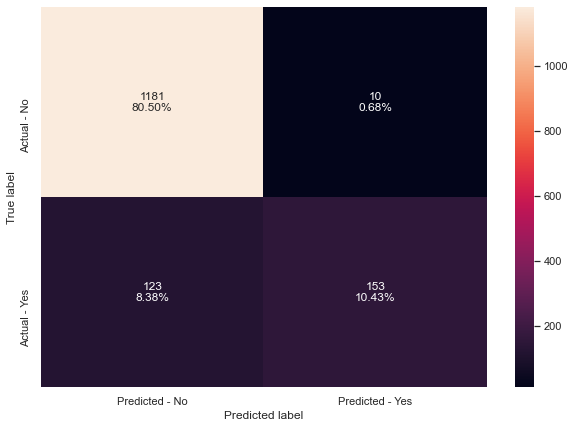

In [97]:
make_confusion_matrix(model=rf_estimator)

The tuned Random Forest classifier is also overfitting the training data and it got a lower precision score than the basic Random Forest.

### Bagging Summary
- All bagging classifiers, except tuned decision tree, are strongly overfitting the training data
- The tuned decision tree did not perform great on the test data
- The highest precision score on the test data is the basic Random Forest, though it overfit the data

## AdaBoost Classifier

In [98]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X=x_train, y=y_train)

AdaBoostClassifier(random_state=1)

In [100]:
abc_p = get_precision_score(model=abc)

Precision score on training set :  0.6879194630872483
Precision score on test set :  0.7258064516129032


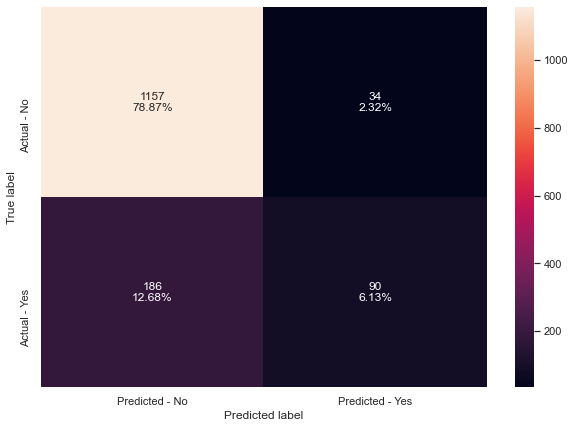

In [101]:
make_confusion_matrix(model=abc)

The basic Adaboost Classifier is not overfitting the data but is not performing that well.

## Tuned Adaboost Classifier

In [111]:
# Choose the type of classifier
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid parameters
# Let's try different max_depth for base estimator
parameters = {"base_estimator": [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2), DecisionTreeClassifier(max_depth=3), DecisionTreeClassifier(max_depth=4)],
              "n_estimators": np.arange(50, 200, 10),
              "learning_rate": np.arange(0.05, .4, 0.05)
             }

# Run the grid search
grid_obj = GridSearchCV(estimator=abc_tuned, param_grid=parameters, cv=5, n_jobs=-1, scoring=scorer)
grid_obj = grid_obj.fit(X=x_train, y=y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
abc_tuned.fit(X=x_train, y=y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.05, n_estimators=120, random_state=1)

In [112]:
tuned_abc_p = get_precision_score(model=abc_tuned)

Precision score on training set :  0.9736842105263158
Precision score on test set :  0.9090909090909091


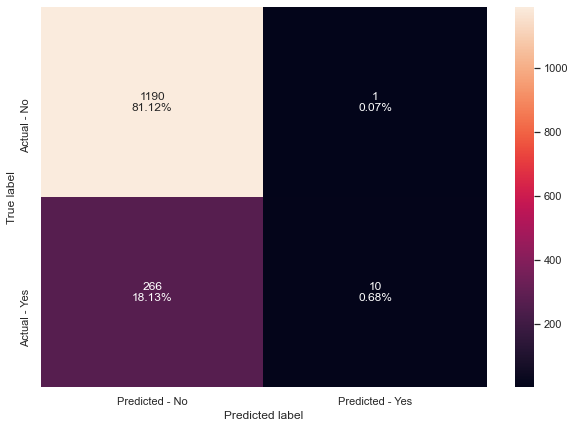

In [113]:
make_confusion_matrix(model=abc_tuned)

Tuned Adaboost is overfitting the training data somewhat, but not completely.  The precision score on the test data is pretty good.

## Gradient Boosting Classifier

In [114]:
gbc = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1), random_state=1)
gbc.fit(X=x_train, y=y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

In [116]:
gbc_p = get_precision_score(model=gbc)

Precision score on training set :  0.8926380368098159
Precision score on test set :  0.7969924812030075


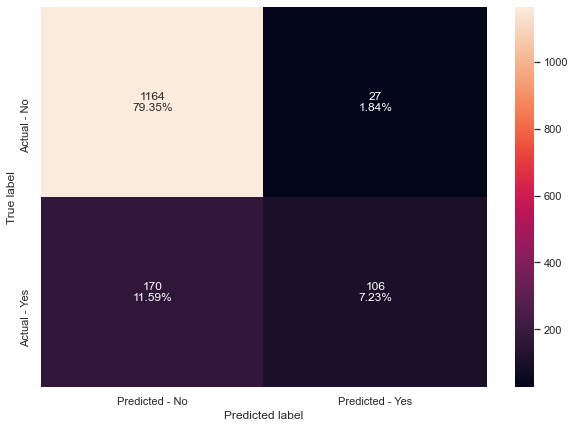

In [117]:
make_confusion_matrix(model=gbc)

The basic Gradient Boosting classifier is not performing well on the data and is overfitting.

## Tuned Gradient Boosting Classifier

In [118]:
# Choose the type of classifier
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1), random_state=1)

# Grid parameters
parameters = {"n_estimators": [100, 150, 200, 250],
              "subsample": [0.8, 0.9, 1],
              "max_features": [0.7, 0.8, 0.9, 1],
              "min_impurity_decrease": [0, 0.00001, 0.0001, 0.001, 0.1]
             }

# Type of scoreing used to compare parameter combinations

# Run the grid search
grid_obj = GridSearchCV(estimator=gbc_tuned, param_grid=parameters, cv=5, n_jobs=-1, scoring=scorer)
grid_obj = grid_obj.fit(X=x_train, y=y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
gbc_tuned.fit(X=x_train, y=y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=1, min_impurity_decrease=0.1,
                           random_state=1, subsample=1)

In [119]:
tuned_gbc_p = get_precision_score(model=gbc_tuned)

Precision score on training set :  0.9603960396039604
Precision score on test set :  0.9117647058823529


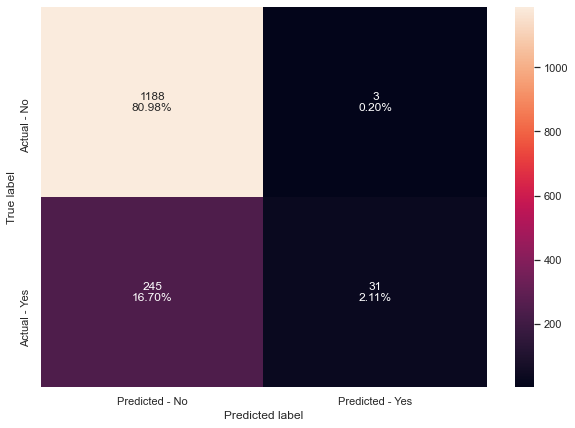

In [120]:
make_confusion_matrix(model=gbc_tuned)

The Tuned Gradient Boost is overfitting somewhat but the precision score on the test data is high.

## XGBoost Classifier

In [121]:
xgb = XGBClassifier(random_state=1, eval_metric="logloss", use_label_encoder=False)
xgb.fit(X=x_train, y=y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [122]:
xgb_p = get_precision_score(model=xgb)

Precision score on training set :  1.0
Precision score on test set :  0.8925233644859814


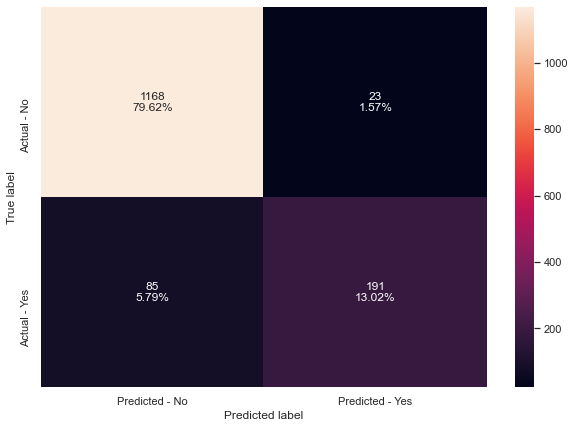

In [123]:
make_confusion_matrix(model=xgb)

The base XGBoost classifier is overfitting the training data.

## Tuned XGBoost Classifier

In [124]:
# Choose the type of classifier
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss", use_label_encoder=False)

# Grid of parameters to choose from
parameters = {"n_estimators": np.arange(30,100,20),
              "subsample": [0.5, 0.7, 1],
              "learning_rate": [0.001, 0.01, 0.05, 0.1],
              "colsample_bytree": [0.5, 0.7, 1],
              "colsample_bylevel": [0.5, 0.7, 1]
             }

# Type of scoring used to compare parameter combinations

# Run the search grid
grid_obj = GridSearchCV(estimator=xgb_tuned, param_grid=parameters, cv=5, n_jobs=-1, scoring=scorer)
grid_obj.fit(X=x_train, y=y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
xgb_tuned.fit(X=x_train, y=y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=30, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.5, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [125]:
tuned_xgb_p = get_precision_score(model=xgb_tuned)

Precision score on training set :  0.9758064516129032
Precision score on test set :  0.8571428571428571


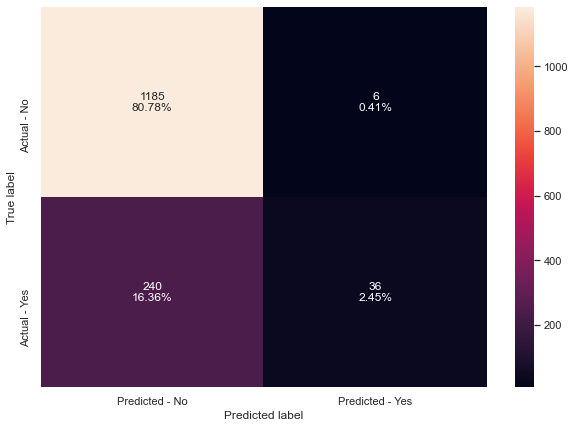

In [126]:
make_confusion_matrix(model=xgb_tuned)

The tuned XGBooster model is overfitting as well.

## Stacking Model

**Now, let's build a stacking model with the tuned models - decision tree, random forest and gradient boosting, then use XGBoost to get the final prediction.**

In [145]:
estimators = [("Decision Tree", dtree_estimator), ("Random Forest", rf_estimator), ("Gradient Boosting", gbc_tuned)]
final_estimator = XGBClassifier(random_state=1, use_label_encoder=False, eval_metric="logloss")

In [146]:
stacking_estimator = StackingClassifier(estimators=estimators, final_estimator=final_estimator, cv=5, n_jobs=-1)
stacking_estimator.fit(X=x_train, y=y_train)

StackingClassifier(cv=5,
                   estimators=[('Decision Tree',
                                DecisionTreeClassifier(max_depth=3,
                                                       max_leaf_nodes=10,
                                                       min_impurity_decrease=1e-06,
                                                       random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(max_features='log2',
                                                       n_estimators=32,
                                                       oob_score=True,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_fe...
                                                 interaction_con

In [147]:
stacking_estimator_p = get_precision_score(model=stacking_estimator)

Precision score on training set :  0.9953560371517027
Precision score on test set :  0.8271604938271605


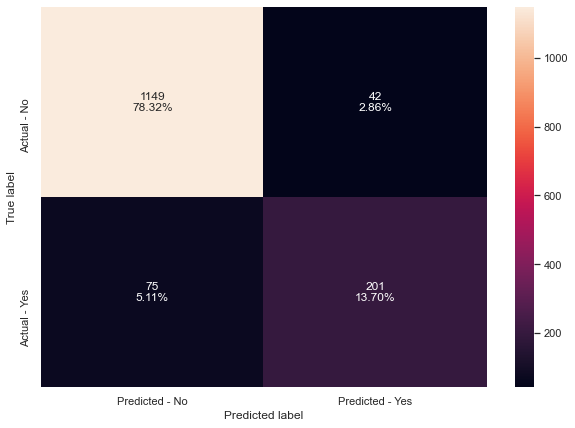

In [148]:
make_confusion_matrix(model=stacking_estimator)

The Stacking Model is overfitting the data.

## Comparing all models

In [150]:
# defining list of models
models = [dtree, dtree_estimator, bagging, bagging_estimator, rf, rf_estimator, abc, abc_tuned, gbc, gbc_tuned, xgb,
         xgb_tuned, stacking_estimator]

# defining empty lists to add train and test results
p_train = []
p_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
    # accuracy score
    j = get_precision_score(model,False)
    p_train.append(j[0])
    p_test.append(j[1])

In [164]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Bagging Classifier',
                                          'Tuned Bagging Classifier',
                                          'Random Forest','Tuned Random Forest','Adaboost Classifier',
                                          'Tuned Adaboost Classifier',
                                          'Gradient Boosting Classifier',
                                          'Tuned Gradient Boosting Classifier',
                                          'XGBoost classifier',
                                          'Tuned XGBoost Classifier',
                                          'Stacking Classifier'],
                                          'Train_Prec': p_train,
                                          'Test_Prec': p_test}) 
comparison_frame

,Model,Train_Prec,Test_Prec
0,Decision Tree,1.000000,0.676364
1,Tuned Decision Tree,0.762295,0.780000
2,Bagging Classifier,1.000000,0.875000
3,Tuned Bagging Classifier,1.000000,0.933735
4,Random Forest,1.000000,0.955975
5,Tuned Random Forest,1.000000,0.938650
6,Adaboost Classifier,0.687919,0.725806
7,Tuned Adaboost Classifier,0.973684,0.909091
8,Gradient Boosting Classifier,0.892638,0.796992
9,Tuned Gradient Boosting Classifier,0.960396,0.911765


Unfortunately, most of the models are overfitting the data.  The top model on the test precision score is the Random Forest.

In [165]:
comparison_frame.loc[np.argmax(comparison_frame["Test_Prec"])]

Model         Random Forest
Train_Prec                1
Test_Prec          0.955975
Name: 4, dtype: object

However, this model is overtrained on the data, so we will select one with a lower precision score on the training data.

In [184]:
not_as_overfit = comparison_frame[comparison_frame["Train_Prec"] <= .99] # grabbing all models with a precision score less than .99 on the training data
not_as_overfit.sort_values(by="Test_Prec", ascending=False)

,Model,Train_Prec,Test_Prec
9,Tuned Gradient Boosting Classifier,0.960396,0.911765
7,Tuned Adaboost Classifier,0.973684,0.909091
11,Tuned XGBoost Classifier,0.975806,0.857143
8,Gradient Boosting Classifier,0.892638,0.796992
1,Tuned Decision Tree,0.762295,0.780000
6,Adaboost Classifier,0.687919,0.725806


In [185]:
not_as_overfit.iloc[np.argmax(not_as_overfit["Test_Prec"])]

Model         Tuned Gradient Boosting Classifier
Train_Prec                              0.960396
Test_Prec                               0.911765
Name: 9, dtype: object

While this model is still overfit, it is not completely overfitting the training data with a precision score of 1.0 and the precision score on the test data is pretty high.  This model also has the smallest difference between the training and testing precision scores of the models above.

So, we will choose the Tuned Gradient Boosting Classifier as our best model.

**Feature Importance**

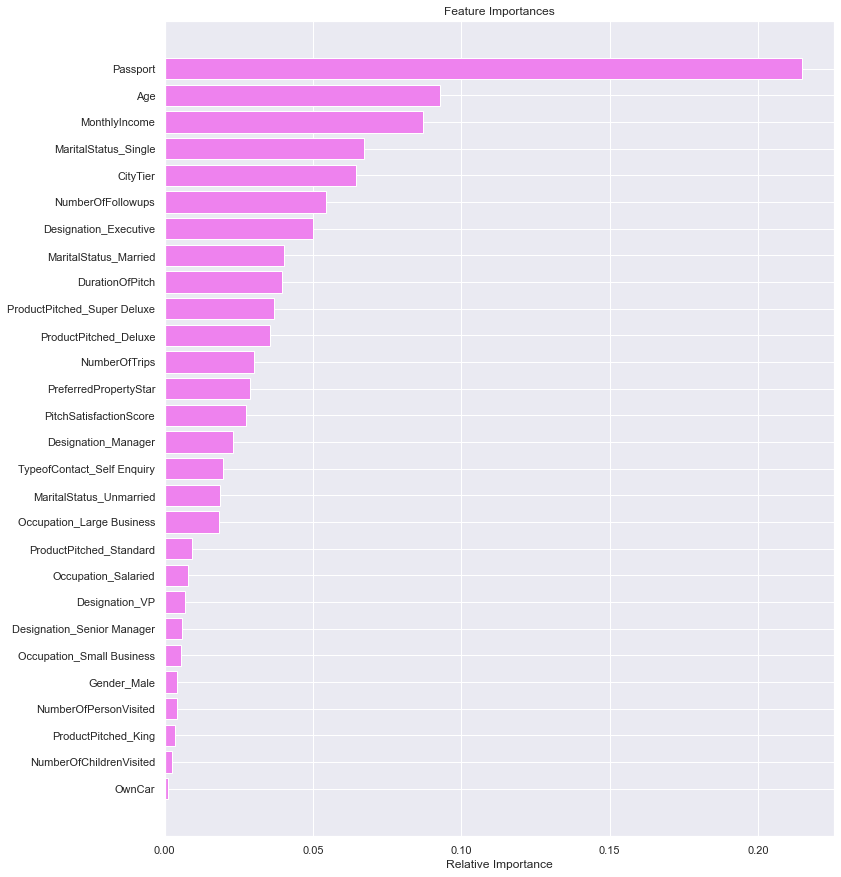

In [180]:
feature_names = x_train.columns
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Conclusion and Business Insights

The Tuned Gradient Boosting Classifier gives the most importance to having a passport, then age, monthly income and single.  Owning a car, number of children and ProductPitched_King hold the least relative importance.

Our top 3 models are
1. Tuned Gradient Boosting Classifier
2. Tuned Adaboost Classifier
3. Tuned XGBoost Classifier

though the tuned XGBoost classifier has a precision score less than 0.9.

One large change to our model would be if we choose a different metric like recall or F1 score to evaluate with.  This would be based off the specific losses we take for identifying customers incorrectly.

Throughout our models we adjusted the different variables each classifier relies upon, such as max_depth, to strengthen our models.  After running a grid search the values of those variables were adjusted as needed to find the best model and then run again.  Typically this meant extending the minimum or maximum values given to a certain classifier's variables so that the best model used values that were not the max or min of the grid search.

As mentioned in the project brief, the company is putting together a new package called "Wellness Tourism".  Our best model, the tuned Gradient Boosting Classifier, does give some importance to the exact product pitched.  The highest of these is Super Deluxe and Deluxe.  With that in mind this model works well if used on customers who have already purchased a product with the company.  However with the addition of the new product for new customers we will not have the knowledge of what they have already purchased.  In that case, we should use a model that does not rely on the product that was pitched.

Customers who were marketed the basic package were most likely to purchase a package and the basic package was the most pitched package so that is the work horse of this business.

While the PitchSatisfactionScore's relative importance is only near the middle, the scores have a large spread.  Improving some of the 1's and 2's would be good for selling more packages and for customers spreading good information about the company to others.